# 正则表达式

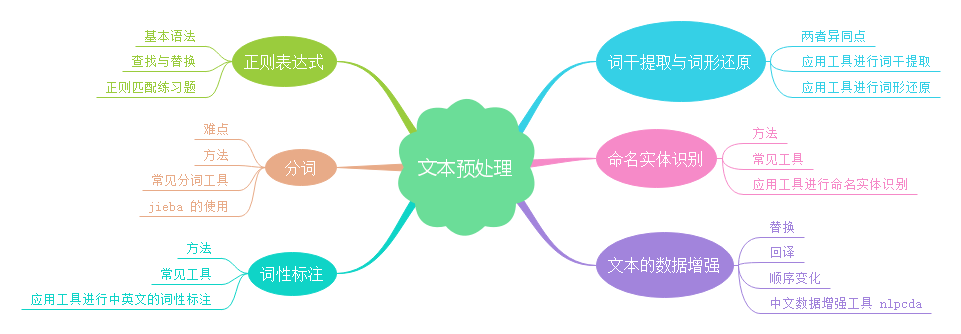

假设有一天，你的上司给你几百个 txt 文本，并且布置了一个任务，找出文本中所有出现的身份证号以及电话号码，并且要求在一个小时内完成。这时候该怎么办呢？总不可能肉眼一个个地去找吧，太费时了！在这里，正则表达式就派上用场了。学会了正则表达式，你就能在 20 分钟内完成此任务。

正则表达式，又称规则表达式，英语称为 Regular Expression，通常被用来检索、替换那些符合某个模式 (规则) 的文本，例如在以上任务中匹配身份证号或者电话号码，是在文本预处理过程中常用的技术。

那么，正则表达式怎么写呢？在这之前，让我们首先来熟悉一些基本的正则表达式的语法：

- **.** ：能够匹配除换行符 \n 以外的任意单个字符。
- **\w** ：与单个字母数字字符匹配。
- **\W** ：与单个非字母数字字符匹配。
- **\d** ：与单个数字匹配。
- **D** ：与单个非数字匹配。
- **\s** ：与单个空格字符（空格，换行符，返回符，制表符，表格）匹配。
- **\S** ：与任何非空格字符匹配。
- **\t** ：匹配单个 tab 符。
- **\n** ：匹配单个换行符。
- **\r**：匹配单个回车符。
- **^ 和 $** ：分别匹配字符串的开头或结尾。
- **[..]** ：匹配方括号中..表达的字符。
- **[^..]** ：匹配方括号中..表达以外的任何字符。
- **{m，n}** ：匹配前一个字符的出现次数在 m 至 n 次之间。
- **a|b** ：匹配 a 或 b。
- **？**：匹配前一个字符出现次数 0 或 1。
- **+**：模式前一个字符出现 1 次或多次。
- *：模式前一个字符出现 0 次或多次。
- \ ：转义字符，通常用于将一些被占用成为正则表达的符号还原为原来的意思，比如 \+ 表示加号。
- **（）**：被括起来的表达式部分将作为分组，并返回相匹配的文本。

如果是第一次接触正则表达式的朋友，可能会觉得这些语法有些难记有些抽像，并且难以理解，这是正常现象，不必担心。事实上，我们通过一些代码示例及练习，便可以快速地在实践中学会灵活使用正则表达式。而在 Python 中，通过内嵌集成 re 模块，我们可以直接调用从而快速实现正则匹配，re 中常用的功能有

- re.match()：从字符串中的首字符开始匹配相应的模式串。
- re.search()：从字符串中的任意位置都可以匹配相应的模式串，只要找到第一个匹配即返回，如果字符串没有匹配，则返回 None。
- re.findall()：从字符串中的任意位置都可以匹配相应的模式串，找到所有匹配情况后返回，如果字符串没有匹配，则返回 None。
- re.sub()：从字符串中的任意位置都可以匹配相应的模式串，找到所有匹配情况后替换成希望的表达形式，返回替换后的字符串。

注：这里的“模式串”，英文称为 pattern，指的便是使用正则语法所构成的一种表达式。

接下来分别就 re.match()，re.search()，re.findall() 做一些简单的代码演示，同学们可以观察结果，深入理解这三者的区别。

In [1]:
import re
# r'自然语言'指模式串，'自然语言处理'指要被匹配的字符串
# 注：模式串前加 r 是为了防止字符转义
result = re.match(r'自然语言', '自然语言处理')
print(result)  # 匹配成功返回一个匹配的对象，否则返回 None

<re.Match object; span=(0, 4), match='自然语言'>


In [2]:
# 基于不同函数获取结果的不同部分：
print('Matching string :', result.group())  # 获取被匹配到的部分
print('Starting position of the match :', result.start())  # 获取被匹配到的部分初始位置
print('Ending position of the match :', result.end())  # 获取被匹配到的部分结束位置


Matching string : 自然语言
Starting position of the match : 0
Ending position of the match : 4


In [3]:
result = re.match(r'语言', '自然语言处理')  # 注意 match 需要从首字符开始匹配
print(result)  # 匹配成功返回一个匹配的对象，否则返回 None

None


In [4]:
# 搜寻字符串中任意位置都可能匹配的模式串，找到首个即返回
result = re.search(r'语言', '自然语言处理自然语言')
print(result)  # 匹配成功返回一个匹配的对象，否则返回 None
print('Matching string :', result.group())  # 获取被匹配到的部分

<re.Match object; span=(2, 4), match='语言'>
Matching string : 语言


In [5]:
# 搜寻字符串中任意位置都可能匹配的模式串，遍历匹配，可以获取字符串中所有匹配的字符串，
result = re.findall(r'语言', '自然语言处理自然语言')
print(result)  # 返回一个列表

['语言', '语言']


在这里总结一下 re.match() , re.search() 以及 re.findall() 之间的区别：
- re.match() 只从字符串的开始位置进行匹配，如果字符串不符合正则表达式，则匹配失败，函数返回 None；
- re.search() 匹配整个字符串，从任意位置都可以开始匹配，直到找到一个匹配即返回；
- re.findall() 则会找到所有匹配结果并返回。

如果想替换字符串中的符合某些模式的地方，可以使用 re.sub()：



In [6]:
# r'自然语言'指模式串，'language'指替换内容，'自然语言处理'指要被匹配的字符串
result = re.sub(r'自然语言', 'language', '自然语言处理语言')
print(result)

language处理语言


通过以上简单的例子，我们熟悉了 re 模块中一些常用函数的功能，接下来增加难度，尝试用更复杂的正则表达式语法规则来解决一些实际问题。

In [7]:
# 使用了模式串 r'^\w+'，这是因为 ^ 表示字符串的开始部分，而 \w+ 可以表示多个连续的字母。
result = re.findall(r'@\w+\.(\w+)',
                    'abc.test@gmail.com, xyz@test.in, '
                    'test.first@analyticsvidhya.com, '
                    'first.test@rest.biz')
print(result)


['com', 'in', 'com', 'biz']


# 分词

分词是自然语言处理中的重要步骤，也就是将句⼦、段落、⽂章这种⻓⽂本，分解为以词为基本单位的数据结构，⽅便后续的处理分析⼯作。为什么要分词呢？这是因为词是表达完整含义的最⼩单位，将文本进行分词后，可以做更细化的文本表征（例如词袋模型、词向量等方式）以及更多的预处理操作（如提取关键词、获取主题）。

那为啥不分字或者以句子为单位呢？一方面，字的粒度太⼩，⽆法表达完整含义，⽐如”⿏“可以是”⽼⿏“，也可以是”⿏标“。另一方面，句⼦的粒度太⼤，承载的信息量多，很难复⽤。所以一般用粒度适中的词作为切分单位。

当然，在有些情况下，分字也可能是更好的选择，比如，处理的文本是古文，这是因为古文中大多以字为词。另外，分字不容易遇到未登录字（专业术语，其实就是“生词”的意思）的问题，而分词容易遇到未登录词的问题。这是因为中文中的字的数量远远小于词的数量，因此很容易在训练文本中覆盖大部分的测试文本中的字。而有的时候，我们也会对粒度进行扩张，比如有些固定短语或者专业术语经常搭配出现（神经网络，支持向量机），也会被当作切分的单位。因此，我们需要根据具体情况进行切分分析。

英⽂有天然的空格作为分隔符，但是中⽂没有。所以如何切分中文是⼀个难点，再加上中⽂⾥⼀词多义的情况⾮常多，导致很容易出现歧义，可以简单地概括为以下三大难点：

- 没有统⼀的标准：⽬前中⽂分词没有统⼀的标准，也没有公认的规范，比如“中华人民共和国”可以看作一个词汇，也可以看作三个词汇，“中华／人民／共和国”，因此很多词汇本身存在分词歧义性。
- 歧义词难以切分：比如“羽毛球拍卖完了”可以切分为“羽毛球／拍卖／完了”或者“羽 毛球拍／卖／完了”，在语法上都逻辑正确，需要一定的生活常识或者联系上下文才能断定到底哪种分词模式更正确。
- 未登录词难以识别：信息爆炸的时代，三天两头就会冒出来⼀堆新词，如何快速地识别出这些新词是⼀⼤难点。⽐如「我方了」、「奥利给」等等，就需要实时更新词表才能准确识别。

分词的⽅法⼤致分为三类：

- 基于词典的匹配分词⽅式：
  - 优点：速度快、成本低。
  - 缺点：适应性不强，不同领域效果差异⼤。
  - 基于词典的匹配，首先将待分词的中⽂⽂本根据⼀定规则切分和调整，然后和词典中的词语进⾏匹配，匹配成功则按照词典的词分词，匹配失败通过调整或者重新选择，如此反复循环即可。代表⽅法有正向最⼤匹配和逆向最⼤匹配及双向匹配法。
- 基于统计的分词⽅法：

  - 优点：适应性较强。
  - 缺点：成本较⾼，速度较慢。
  - ⽬前常⽤的是算法是 HMM、CRF、SVM、深度学习等算法，⽐如 stanford、Hanlp 分词⼯具便是基于 CRF 的算法。以 CRF 为例，基本思路是对汉字进⾏标注训练，不仅考虑了词语的出现频率，还考虑上下⽂，具备较好的学习能⼒，因此其对歧义词和未登录词的识别都具有良好的效果。
- 基于深度学习：

  - 优点：准确率⾼、适应性强。
  - 缺点：成本⾼，速度慢。
  - 可以使⽤双向 LSTM+CRF 实现分词器，其本质上也是序列标注，所以有通⽤性，命名实体识别等都可以使⽤该模型，准确率较⾼，但是需要大量标注数据。

常⻅的分词器都是使⽤机器学习算法和词典相结合的方法，⼀⽅⾯能够提⾼分词准确率，另⼀⽅⾯能够改善领域适应性。

注：对于如何把分词问题转化为序列标注问题，这里有些朋友可能会觉得疑惑。实际上我们可以这样来做：分别用 B、M、E 来表示某词的头、中、尾三部分，并且 S 代表单字成词。以句子“王先生就职于武汉大学”为例，以每个字为单位对其进行序列标注，便是“BMEBESBMME”，再根据词的头、中、尾规则进行切分成词，便是“BME／BE／S／BMME”，如此一来，便可以对应到分词结果“王先生／就职 ／于／武汉大学”。

根据 GitHub 上的 star 数排名的中文分词工具：

- Hanlp
- Stanford 分词
- ansj 分词器
- 哈⼯⼤ LTP
- KCWS 分词器
- jieba
- 清华⼤学 THULAC
- ICTCLAS

在实际应用中，一般情况下，我们只需要调包进行分词就可以了，几行代码就能搞定分词。接下来以 jieba 为例，我们来实现中文的分词。

全模式，也就是会把所有可能的分词结果都展示出来：

In [8]:
# 全模式，也就是会把所有可能的分词结果都展示出来
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print('FUll Mode:'+'/'.join(seg_list))


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CHANGE~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.505 seconds.
Prefix dict has been built successfully.


FUll Mode:我/来到/北京/清华/清华大学/华大/大学


In [9]:
# 精确模式，只取一种最有可能的切分方式：
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: 我/ 来到/ 北京/ 清华大学


In [10]:
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")
print(", ".join(seg_list))

小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


当然，简单的调包有时候在下游任务中并不完全适用，比如难以正确地切分一些专业词汇、领域词汇或者新出现的词汇，可以通过在 jieba 中添加新词的方式进行解决。如何应用呢？首先，我们要新建一个词典文件，如 new_word.txt ,其中的内容规则如下：

- 一个新词占一行。
- 每一行分三部分：词语、词频 freq（可省略）、词性 tag（可省略），用空格隔开，顺序不可颠倒。
- 文件优先用 UTF-8 来编码。

例如：
创新办 3 i  
云计算 5  
凱特琳 3 nz  
台中  

最后，通过 jieba.load_userdict(file_path) 就能加载新的词典，其中 file_path 表示词典文件的路径，我们可以对比新词载入前后的效果。

In [11]:
seg_list = jieba.cut('胡小胖是创新办主任，也是云计算方面的专家。',cut_all=False)
print("before:"+"/".join(seg_list))
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/new_word.txt"
jieba.load_userdict("new_word.txt")
seg_list = jieba.cut("胡小胖是创新办主任，也是云计算方面的专家。", cut_all=False)
print("After: " + "/ ".join(seg_list))


before:胡小胖/是/创新/办/主任/，/也/是/云/计算/方面/的/专家/。
After: 胡小胖/ 是/ 创新办/ 主任/ ，/ 也/ 是/ 云计算/ 方面/ 的/ 专家/ 。


File 'new_word.txt' already there; not retrieving.



另外需要注意的是，如果新词数较少，通过创建、导入词典的文件过于复杂，或者定义了词典，又想做一些改动。在这些情况下，可以通过在代码中使用 add_word(word, freq=None, tag=None) 和 del_word(word) ，在程序中动态修改词典

- add_word(word, freq=None, tag=None)：添加新词。
- del_word(word) ：去除某个词。

In [12]:
# 在程序中动态地去除新词“创新办”
jieba.del_word("创新办")
seg_list = jieba.cut("胡小胖是创新办主任，也是云计算方面的专家。", cut_all=False)
print("After: " + "/ ".join(seg_list))

After: 胡小胖/ 是/ 创新/ 办/ 主任/ ，/ 也/ 是/ 云计算/ 方面/ 的/ 专家/ 。
